In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC

# Gọi dữ liệu và xóa cột
df = pd.read_csv("C:/Users/ADMIN/Downloads/diabetes.csv")
df.drop(['Pregnancies', 'SkinThickness', 'BloodPressure', 'Insulin', 'DiabetesPedigreeFunction', 'Age'], axis=1, inplace=True)

# Hiển thị 10 dòng đầu tiên
df.head(10)

,Glucose,BMI,Outcome
0,148,33.6,1
1,85,26.6,0
2,183,23.3,1
3,89,28.1,0
4,137,43.1,1
5,116,25.6,0
6,78,31.0,1
7,115,35.3,0
8,197,30.5,1
9,125,0.0,1


In [3]:
# Chia dữ liệu thành features (đặc trưng) và target (nhãn)
X = df.drop('Outcome', axis=1)  # features
y = df['Outcome']  # target

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = svm_model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [4]:
# Tính các thông số
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Làm tròn các giá trị
accuracy = round(accuracy, 2)
precision = round(precision, 2)
recall = round(recall, 2)
f1 = round(f1, 2)

# Tạo DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
})
metrics_df_horizontal = metrics_df.transpose()
metrics_df_horizontal.columns = metrics_df_horizontal.iloc[0]
metrics_df_horizontal = metrics_df_horizontal[1:]

metrics_df_horizontal

Metric,Accuracy,Precision,Recall,F1 Score
Score,0.77,0.71,0.62,0.66


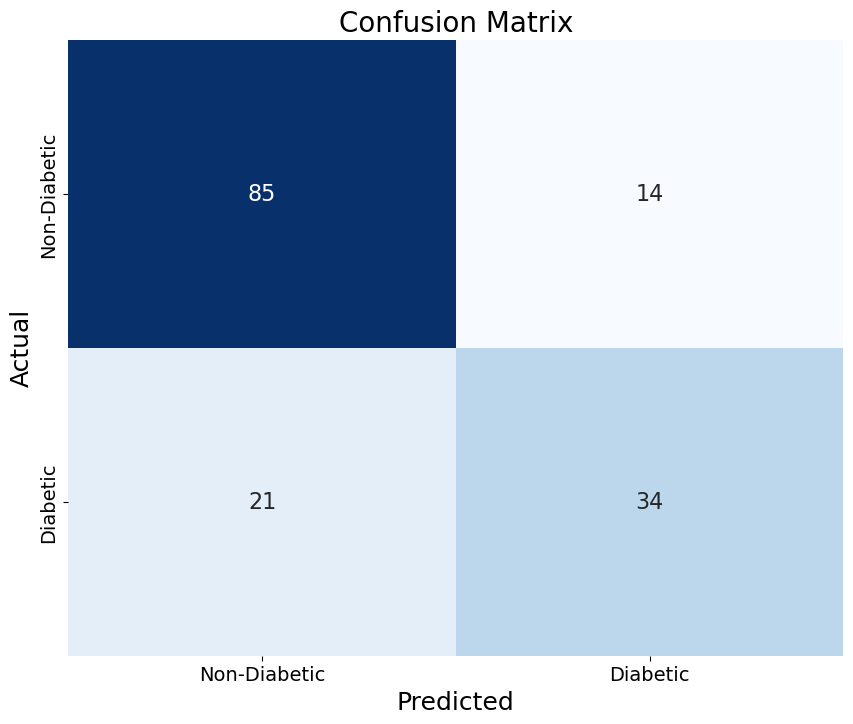

In [6]:
cm = confusion_matrix(y_test, y_pred)

# Đổi nhãn 0 và 1 thành chữ
labels = ['Non-Diabetic', 'Diabetic']

# Vẽ biểu đồ nhiệt cho ma trận nhầm lẫn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels, annot_kws={"size": 16})
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.title('Confusion Matrix', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3220\2984477850.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y == label].iloc[:, 0], X[y == label].iloc[:, 1],


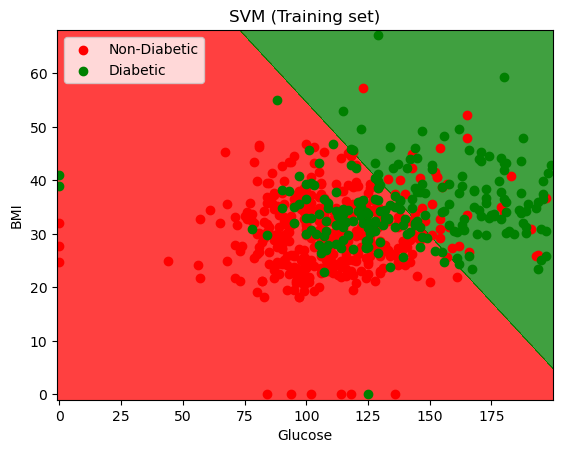

In [6]:
# trực quan
from matplotlib.colors import ListedColormap


def plot_decision_boundary(X, y, classifier, title, label_0, label_1):
    X1, X2 = np.meshgrid(np.arange(start = X.iloc[:, 0].min() - 1, stop = X.iloc[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X.iloc[:, 1].min() - 1, stop = X.iloc[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    # Plot points with custom labels
    for i, label in enumerate(np.unique(y)):
        plt.scatter(X[y == label].iloc[:, 0], X[y == label].iloc[:, 1],
                    c = ListedColormap(('red', 'green'))(i), label = label_1 if label == 1 else label_0)

    plt.title(title)
    plt.xlabel('Glucose')
    plt.ylabel('BMI')
    plt.legend()
    plt.show()


plot_decision_boundary(X_train, y_train, svm_model, 'SVM (Training set)', 'Non-Diabetic', 'Diabetic')
